In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn

In [7]:
df = pd.read_csv('UNM_Data/total_headcount.csv')
df.ix[:, 'Total_Headcount'] = df.ix[:, 'Male_Headcount'] + df.ix[:, 'Female_Headcount']

In [8]:
df.head()

,Reporting_Semester,Reporting_Year,Reported_Year,Male_Headcount,Female_Headcount,Total_Headcount
0,spring,2016,2016,11349,13950,25299
1,spring,2016,2015,11629,14187,25816
2,spring,2016,2014,11907,14842,26749
3,spring,2016,2013,11992,15205,27197
4,spring,2016,2012,12177,15101,27278


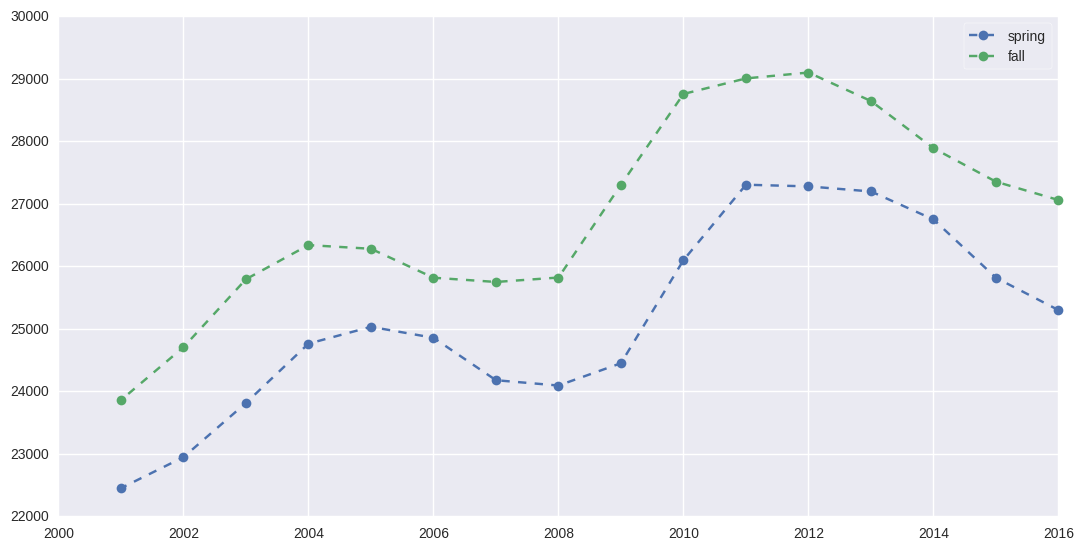

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

for sem in ['spring', 'fall']:
    temp = df[df['Reporting_Semester'] == sem]
    
    X = temp['Reported_Year'].values
    Y = temp['Total_Headcount'].values
    
    ax.plot(X, Y, ls='--', marker='o', clip_on=False, label=sem)
    
ax.legend(loc=0, frameon=True, fancybox=True)

(0.4, 0.6)

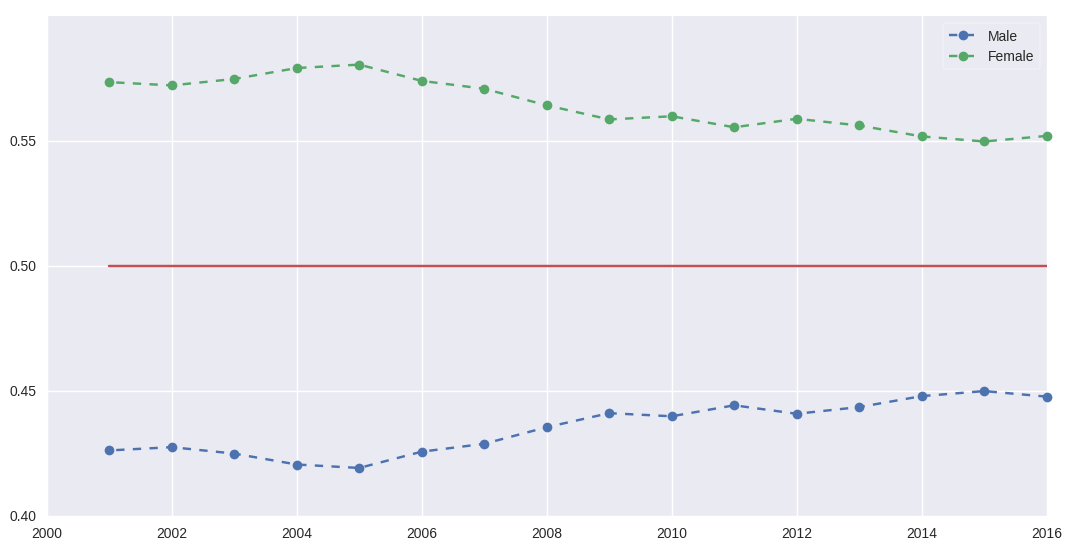

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0, 0, 1, 1])

temp = df[df['Reporting_Semester'] == 'fall']

X = temp['Reported_Year'].values

for g in ['Male', 'Female']:
    Y = temp.ix[:, '{0}_Headcount'.format(g)] / temp.ix[:, 'Total_Headcount']

    ax.plot(X, Y, ls='--', marker='o', clip_on=False, label=g)

ax.plot(X, .5*np.ones_like(X))
ax.legend(loc=0, frameon=True, fancybox=True)
ax.set_ylim([0.4, 0.6])

In [125]:
df = pd.read_csv('UNM_Data/headcount_fine_grained.csv', parse_dates=True)

In [126]:
df.columns

Index(['Degree', 'Gender', 'Load', 'Year', 'Headcount'], dtype='object')

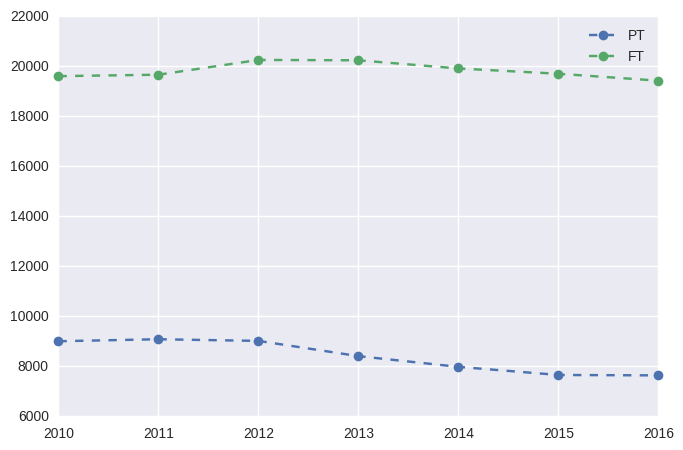

In [127]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for l in ['PT', 'FT']:
    temp = df[df['Load'] == l].groupby('Year').sum().reset_index()
    X = temp['Year'].values
    Y = temp['Headcount'].values

    ax.plot(X, Y, ls='--', marker='o', clip_on=False, label=l)
    
ax.legend(loc=0)
ax.set_xticks(X)
ax.set_xticklabels(X)
plt.show()

In [132]:
d = {0: [['Undergraduate'], 'Undergraduate'],\
    2: [['Graduate_Programs', 'Anderson_Graduate', 'Law_School',\
         'Medical_School', 'Doctor_of_Pharmacy', 'Doctor_of_Nursing_Practice', 'Doctor_of_Physical_Therapy'],\
        'Graduate/Professional'],\
    3: [['Concurrent', 'Non_Degree', 'Non_Degree_Undergraduate', 'Non_Degree_Graduate'], 'Other']
    }

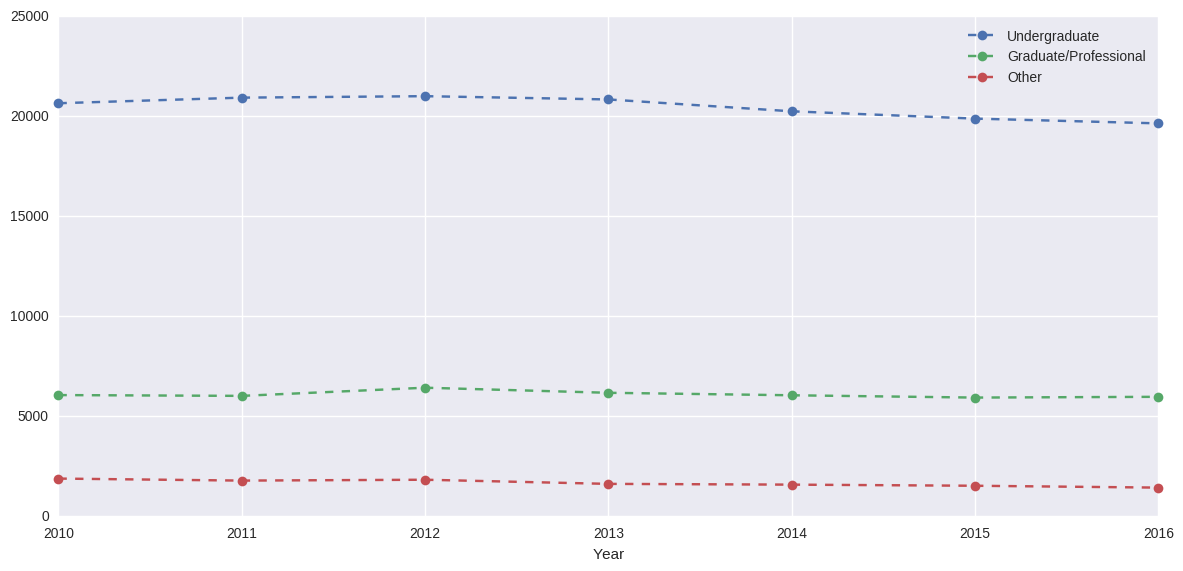

In [134]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_axes([0, 0, 1, 1])

for k in d.keys():
    df[df['Degree'].isin(d[k][0])].groupby('Year').sum().reset_index()\
                .plot(x='Year', y='Headcount', ax=ax, label=d[k][1], ls='--', marker='o', clip_on=False)
        
ax.legend(loc=0)
ax.set_xticks(df['Year'].unique())
ax.set_xticklabels(df['Year'].unique())
plt.show()

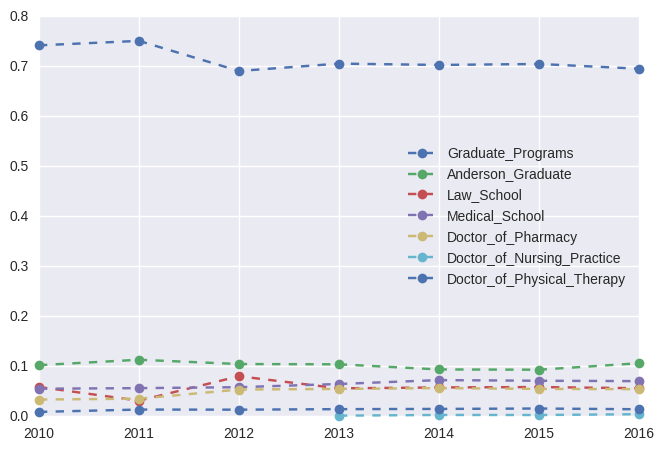

In [166]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])


for degree in d[2][0]:
    temp = df[df['Degree'] == degree].groupby('Year').sum().reset_index()\
            .merge(df[df['Degree'].isin(d[2][0])].groupby(['Year']).sum().reset_index().rename(columns={'Headcount':'Total'}), on='Year')
    
    X = temp['Year']
    Y = temp['Headcount'] / temp['Total']
    
    ax.plot(X, Y, ls='--', marker='o', clip_on=False, label=degree)
    
ax.legend(loc=0)
ax.set_xticks(temp['Year'].unique())
ax.set_xticklabels(temp['Year'].unique())
plt.show()

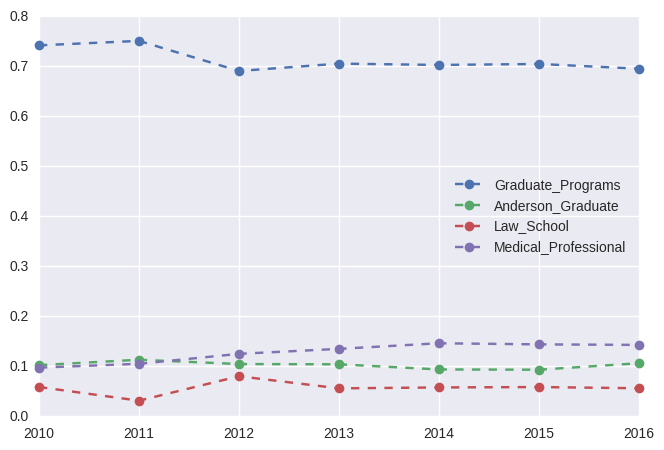

In [169]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])


for degree in ['Graduate_Programs', 'Anderson_Graduate', 'Law_School']:
    temp = df[df['Degree'] == degree].groupby('Year').sum().reset_index()\
            .merge(df[df['Degree'].isin(d[2][0])].groupby(['Year']).sum().reset_index().rename(columns={'Headcount':'Total'}), on='Year')
    
    X = temp['Year']
    Y = temp['Headcount'] / temp['Total']
    
    ax.plot(X, Y, ls='--', marker='o', clip_on=False, label=degree)

meds = ['Medical_School', 'Doctor_of_Pharmacy', 'Doctor_of_Nursing_Practice', 'Doctor_of_Physical_Therapy']
temp = df[df['Degree'].isin(meds)].groupby('Year').sum().reset_index()\
            .merge(df[df['Degree'].isin(d[2][0])].groupby(['Year']).sum().reset_index().rename(columns={'Headcount':'Total'}), on='Year')
    
X = temp['Year']
Y = temp['Headcount'] / temp['Total']
ax.plot(X, Y, ls='--', marker='o', clip_on=False, label='Medical_Professional')

ax.legend(loc=0)
ax.set_xticks(temp['Year'].unique())
ax.set_xticklabels(temp['Year'].unique())
plt.show()